In [4]:

!pip install xgboost



  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/ab/a2/876d56ae72d7472b7a4228b880f1aaaa9c01817e05b4943674c9384ff20a/xgboost-2.1.2-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.8 MB/s eta 0:00:00a 0:00:01


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier


In [6]:
df=pd.read_csv('./heart_2020_cleaned.csv')

In [7]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [8]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

/var/folders/9b/wyqxcw0116x7ktssy3jjgsq80000gn/T/ipykernel_78866/1374297858.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x="SleepTime",hue='HeartDisease',shade='True')
/Users/geruijia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/geruijia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/geruijia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a f

<Axes: xlabel='SleepTime', ylabel='Density'>

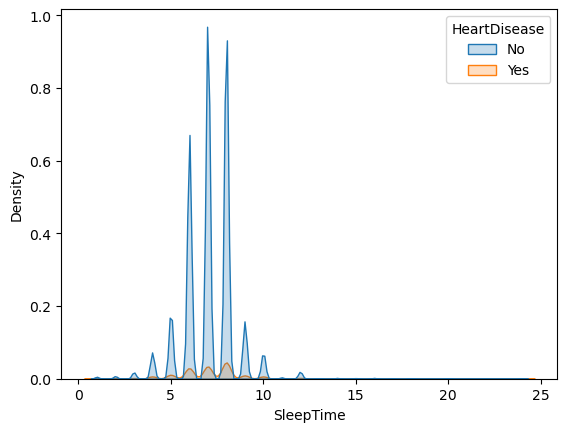

In [9]:
sns.kdeplot(data=df,x="SleepTime",hue='HeartDisease',shade='True')

/Users/geruijia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/geruijia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/geruijia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/geruijia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

<Axes: title={'center': 'AgeCategory with HeartDisease'}, xlabel='AgeCategory', ylabel='count'>

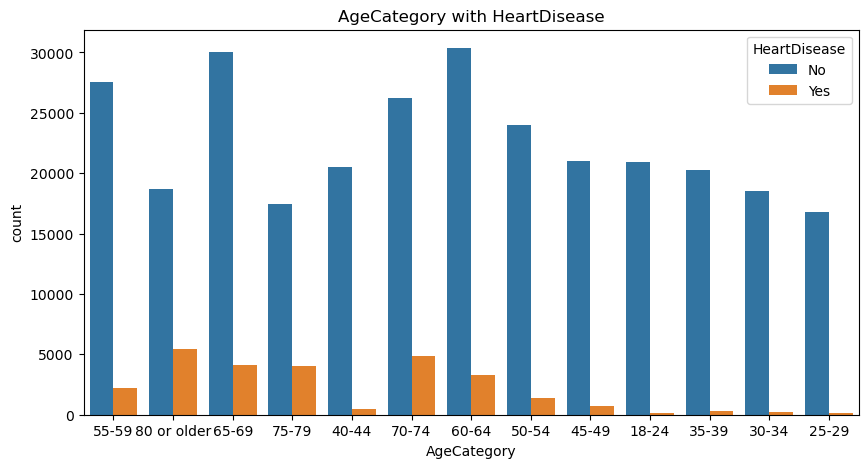

In [10]:
plt.figure(figsize = (10,5))
plt.title("AgeCategory with HeartDisease")
sns.countplot(df,x="AgeCategory",hue="HeartDisease")

In [11]:
from sklearn.preprocessing import LabelEncoder

data1=df.copy()
le = LabelEncoder()
le.fit(data1['HeartDisease'])
data1['HeartDisease']=le.transform(data1['HeartDisease'])

le.fit(data1['Smoking'])
data1['Smoking']=le.transform(data1['Smoking'])

le.fit(data1['AlcoholDrinking'])
data1['AlcoholDrinking']=le.transform(data1['AlcoholDrinking'])

le.fit(data1['Stroke'])
data1['Stroke']=le.transform(data1['Stroke'])

le.fit(data1['DiffWalking'])
data1['DiffWalking']=le.transform(data1['DiffWalking'])

le.fit(data1['Sex'])
data1['Sex']=le.transform(data1['Sex'])

le.fit(data1['AgeCategory'])
data1['AgeCategory']=le.transform(data1['AgeCategory'])

le.fit(data1['Race'])
data1['Race']=le.transform(data1['Race'])

le.fit(data1['Diabetic'])
data1['Diabetic']=le.transform(data1['Diabetic'])


le.fit(data1['PhysicalActivity'])
data1['PhysicalActivity']=le.transform(data1['PhysicalActivity'])

le.fit(data1['GenHealth'])
data1['GenHealth']=le.transform(data1['GenHealth'])

le.fit(data1['Asthma'])
data1['Asthma']=le.transform(data1['Asthma'])

le.fit(data1['KidneyDisease'])
data1['KidneyDisease']=le.transform(data1['KidneyDisease'])

le.fit(data1['SkinCancer'])
data1['SkinCancer']=le.transform(data1['SkinCancer'])

<Axes: >

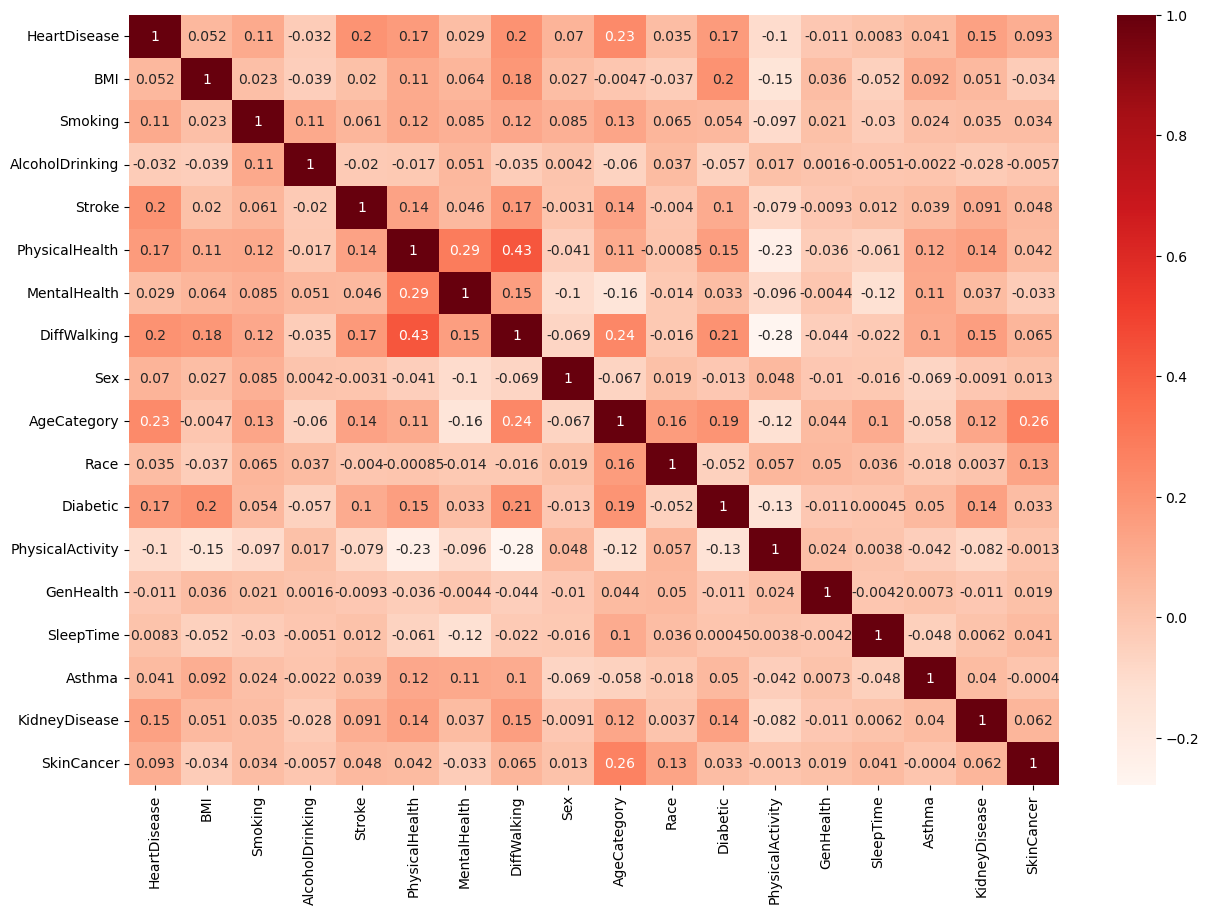

In [12]:
plt.figure(figsize = (15,10))
sns.heatmap(data1.corr(),annot = True,cmap='Reds')

In [13]:
from sklearn.model_selection import train_test_split
x = data1.drop(["HeartDisease"] , axis = 1).values
y = data1["HeartDisease"].values

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [15]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

In [16]:
ro_scaler = RobustScaler()
x_train_1 = ro_scaler.fit_transform(x_train)
x_test_1 = ro_scaler.fit_transform(x_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rcf=RandomForestClassifier()
rcf.fit(x_train_1,y_train)

RandomForestClassifier()

In [18]:
y_pred=rcf.predict(x_test)

In [20]:
accuracy_score(y_test, y_pred)*100

86.89789740959863